# Basic Data analyses

## Load in the data

In [1]:
import numpy as np, sys, scipy.stats, pandas as pd, os, os.path, csv, PythonAnalyses

import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
pd.options.display.mpl_style = 'default'

Start = 1 #if I want to reload data from csvs = 1. If i want to load python pickle == 0

filename = 'AdditionalSingleton_TargetUncertain2.csv'
csvName = 'AdditionalSingleton_TargetUncertain2'

if sys.platform == 'linux2': #is this my linux laptop
    path = '/home/dan/Dropbox/TargetUncertainty/Exp2'
elif sys.platform == 'darwin': #is this my mac work comp    
    path = '/Users/danvatterott/Dropbox Encore/Dropbox/TargetUncertainty/Exp2/'

os.chdir(path)

if Start == 1: #load in data from csv
    numfiles = len([name for name in os.listdir('.') if os.path.isfile(name) and name.endswith(".csv") and name[0].isdigit()])
    for partnum in xrange(1,numfiles+1): #this is a loop that goes through all participants
        filename = '%s_' % str(partnum) + csvName + '.csv'
        if partnum == 1: 
            df = pd.read_csv(filename)
        if partnum > 1: 
            df = df.append(pd.read_csv(filename))
    df.columns = map(str.lstrip, df.columns)
    df.to_pickle(csvName+'.pkl') #save this data frame all together
elif Start == 0: #load the data from a previously saved python file. should save time if not adding csv data. 
    df = pd.read_pickle(csvName+'.pkl')

In [2]:
df[0:3] #take a quick look at the dataframe. 

,TarType,TarLoc,TarColorCode,DistCond,TarDistDist,DistLoc,DistLine,Resp,Block,ConstantTar,Acc,RT,Sub#
0,1,1,4,1,0,0,0,0,0,0,0,2000.0000,1
1,1,1,4,2,2,4,1,2,0,0,0,2297.4737,1
2,1,4,4,1,0,0,0,1,0,0,1,1620.1343,1


SingletonCueMatch = 1 = color singleton at cued location/object
SingletonCueMatch = 2 = color singleton at uncued location/object
SingletonCueMatch = 0 = color singleton absent
BlockType = 1 = cross
BlockType = 2 = circle
BlockType = 3 = cardinal
BlockType = 4 = diagonal

## Data Trimming

data trimming. correct, slower than 300 ms and faster than 1500. 

In [3]:
Trimmer = df['Block'] > 0 #not the practice block
Trimmer2 = df['Acc'] == 1 #not an error trial
Trimmer3 = df['RT'] > 300 #not a super fast response
PartTrim = (df['Sub#'] != 66)

DistCond = df[Trimmer & Trimmer2 & Trimmer3].groupby(['DistCond','Sub#']) 
RTTrim = DistCond['RT'].mean() + 2.5*DistCond['RT'].std(ddof=0)
subList = df.drop_duplicates(subset='Sub#')
TrimmerOld = [False]*len(df)
for sub in subList['Sub#']: #loop through every subject. 
    TrimmerA = (df.DistCond == 1) & (df['RT'] < RTTrim[1][sub]) & (df['Sub#'] == sub)
    TrimmerB = (df.DistCond == 2) & (df['RT'] < RTTrim[2][sub]) & (df['Sub#'] == sub)
    Trimmer4 = [any(tup) for tup in zip(TrimmerA, TrimmerB, TrimmerOld)] #combine those 2 RT trimmers. 
    TrimmerOld = Trimmer4

In [4]:
totalTrialNum = np.size(df[PartTrim & Trimmer],0)
ex_counter = 0
Total=0
for sub in df['Sub#'].unique(): #loop through every subject. 
    TrimmerA = (df[Trimmer].DistCond == 1) & (df[Trimmer]['RT'] > RTTrim[1][sub]) & (df[Trimmer]['Sub#'] == sub) & (df[Trimmer].Acc==1)
    TrimmerB = (df[Trimmer].DistCond == 2) & (df[Trimmer]['RT'] > RTTrim[2][sub]) & (df[Trimmer]['Sub#'] == sub) & (df[Trimmer].Acc==1)
    TrimmerC = df[Trimmer]['RT'] < 300 & (df[Trimmer].Acc==1)
    Total+= (sum(TrimmerA)+sum(TrimmerB)+sum(TrimmerC))
Total = sum(TrimmerA) + sum(TrimmerC)
print Total
print totalTrialNum
Rt_ex = float(Total)/float(totalTrialNum)
print '%.9f' % Rt_ex
#measuring how many trials are excluded. 

8
4992
0.001602564


checking acc. looks good. everyone above 90%

In [5]:
tableAcc = df[Trimmer].pivot_table(values='Acc', index='Sub#', aggfunc=np.mean)
tableAcc

Sub#
1     0.921875
2     0.932292
3     0.966146
4     0.966146
5     0.947917
6     0.979167
7     0.950521
8     0.992188
9     0.963542
10    0.968750
11    0.929688
12    0.976562
13    0.958333
Name: Acc, dtype: float64

## RT Data

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			714.9			742.97			
2			600.6			593.62			
3			629.28			638.36			
4			678.73			677.07			
5			659.03			672.37			
6			749.9			742.93			
mean			672.07			677.89			
STE			22.39			23.92			
----------------------------------------------------------------------------------------------------
ttest = (-1.0352063954680686, 0.34802037679234443)
n = 6


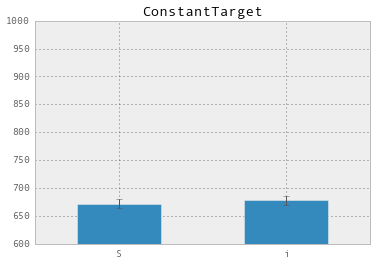

In [6]:
ConType = df['ConstantTar'] == 1
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','ConstantTarget')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			740.83			728.63			
2			644.46			675.08			
3			718.8			812.22			
4			562.28			579.05			
5			828.14			905.57			
6			663.84			674.34			
7			611.23			599.28			
mean			681.37			710.59			
STE			33.54			43.9			
----------------------------------------------------------------------------------------------------
ttest = (-1.8604810281392208, 0.11214895913866359)
n = 7


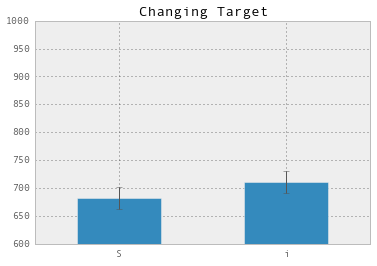

In [7]:
ConType = df['ConstantTar'] == 0
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Changing Target')

In [9]:
ConType = df['ConstantTar'] == 1
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
Diff_Constant = tableRT[2]-tableRT[1]
ConType = df['ConstantTar'] == 0
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
Diff_Change = tableRT[2]-tableRT[1]

scipy.stats.ttest_ind(Diff_Constant, Diff_Change)

(-1.1163392114926591, 0.29038229153073197)

In [10]:
ConType = df['ConstantTar'] == 1
tableRT3 = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=[], aggfunc=np.mean)
ConType = df['ConstantTar'] == 0
tableRT4 = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=[], aggfunc=np.mean)

scipy.stats.ttest_ind(tableRT3, tableRT4)

(-0.4173799914381271, 0.68521992491731998)

In [11]:
df['Col_prevTrial'] = df['TarColorCode'].shift(periods=1)

In [12]:
df['Col_Rep'] = 0
df.loc[(df['Col_prevTrial'] == df['TarColorCode']), 'Col_Rep'] = 1

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			740.83			728.63			
2			640.18			672.62			
3			718.99			786.95			
4			575.52			577.77			
5			828.37			908.18			
6			642.84			686.34			
7			612.51			600.31			
mean			679.89			708.69			
STE			32.98			42.82			
----------------------------------------------------------------------------------------------------
ttest = (-2.0325232093528118, 0.088354493884817933)
n = 7


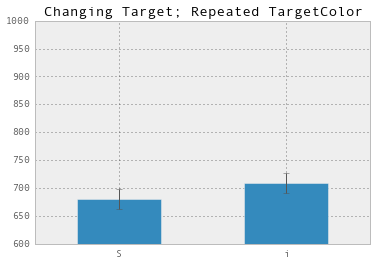

In [13]:
ConType = df['ConstantTar'] == 0
TarRep = df['Col_Rep'] == 1
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType & TarRep].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Changing Target; Repeated TargetColor')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			646.14			675.95			
2			718.73			820.64			
3			556.77			579.52			
4			828.07			904.54			
5			671.53			670.3			
6			610.78			598.87			
mean			672.0			708.31			
STE			38.4			52.34			
----------------------------------------------------------------------------------------------------
ttest = (-2.0006402655802127, 0.10185616422704002)
n = 6


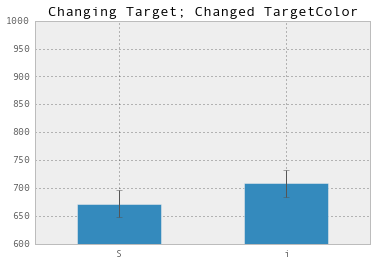

In [14]:
ConType = df['ConstantTar'] == 0
TarRep = df['Col_Rep'] == 0
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType & TarRep].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Changing Target; Changed TargetColor')

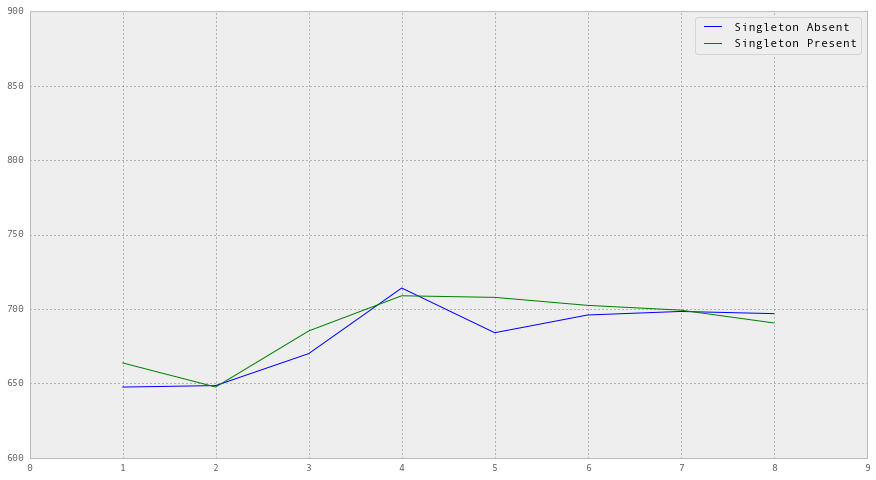

In [14]:
ConType = df['ConstantTar'] == 1
tableRT2 = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Block', columns=['DistCond'], aggfunc=np.mean)

xdata = df['Block'][PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].unique()
Absent  = tableRT2[1]
Present = tableRT2[2]

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)

axes.plot(xdata, Absent, 'blue', label='Singleton Absent'); 
axes.plot(xdata, Present, 'green', label='Singleton Present')
axes.legend()
axes.set_ylim(600,900)
axes.set_xlim(0,9);

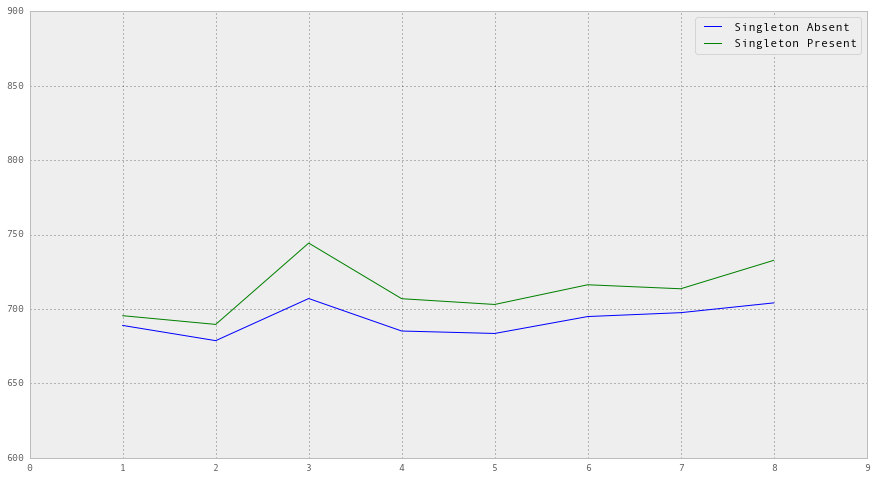

In [15]:
ConType = df['ConstantTar'] == 0
tableRT2 = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Block', columns=['DistCond'], aggfunc=np.mean)

xdata = df['Block'][PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].unique()
Absent  = tableRT2[1]
Present = tableRT2[2]

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)

axes.plot(xdata, Absent, 'blue', label='Singleton Absent'); 
axes.plot(xdata, Present, 'green', label='Singleton Present')
axes.legend()
axes.set_ylim(600,900)
axes.set_xlim(0,9);